In [2]:
from keras.layers import Input , Lambda , Dense , Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224,224]

train_path = 'train'
valid_path = 'test'

In [5]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3] , weights = 'imagenet' , include_top =False)


58889256/58889256 [==============================] - 27s 0us/step


In [6]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('train\*')

In [9]:
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders) , activation = 'softmax')(x)

In [12]:
model = Model(inputs = vgg.input , outputs = prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [17]:
#ImageDataGenerator is used to load the images and check whether the image is tilted or not etc
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2 , 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size = 32 ,
                                                 class_mode = 'categorical'
                                                )

Found 5216 images belonging to 2 classes.


In [20]:
test_set = train_datagen.flow_from_directory('test',
                                                 target_size = (224,224),
                                                 batch_size = 32 ,
                                                 class_mode = 'categorical'
                                                )

Found 624 images belonging to 2 classes.


In [23]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-23-c25aaf53adde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
20/20 [==============================] - 347s 18s/step - loss: 0.8192 - accuracy: 0.6731 - val_loss: 0.2581 - val_accuracy: 0.8990
Epoch 2/5
20/20 [==============================] - 354s 18s/step - loss: 0.2663 - accuracy: 0.9006 - val_loss: 0.1924 - val_accuracy: 0.9295
Epoch 3/5
20/20 [==============================] - 414s 21s/step - loss: 0.1865 - accuracy: 0.9359 - val_loss: 0.1760 - val_accuracy: 0.9311
Epoch 4/5
20/20 [==============================] - 388s 20s/step - loss: 0.1643 - accuracy: 0.9279 - val_loss: 0.1564 - val_accuracy: 0.9407
Epoch 5/5
20/20 [==============================] - 374s 19s/step - loss: 0.1768 - accuracy: 0.9215 - val_loss: 0.1775 - val_accuracy: 0.9279


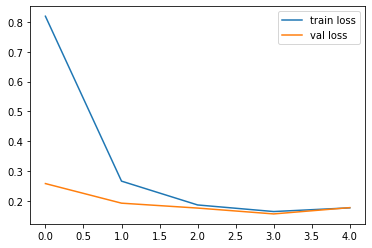

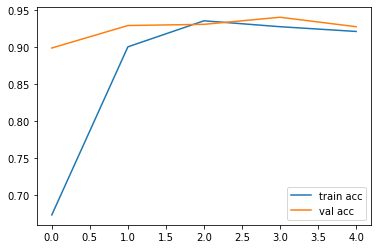

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'] , label = 'train loss')
plt.plot(r.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'] , label = 'train acc')
plt.plot(r.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
import tensorflow as tf


from keras.models import load_model
model.save('model_vgg16.h5')

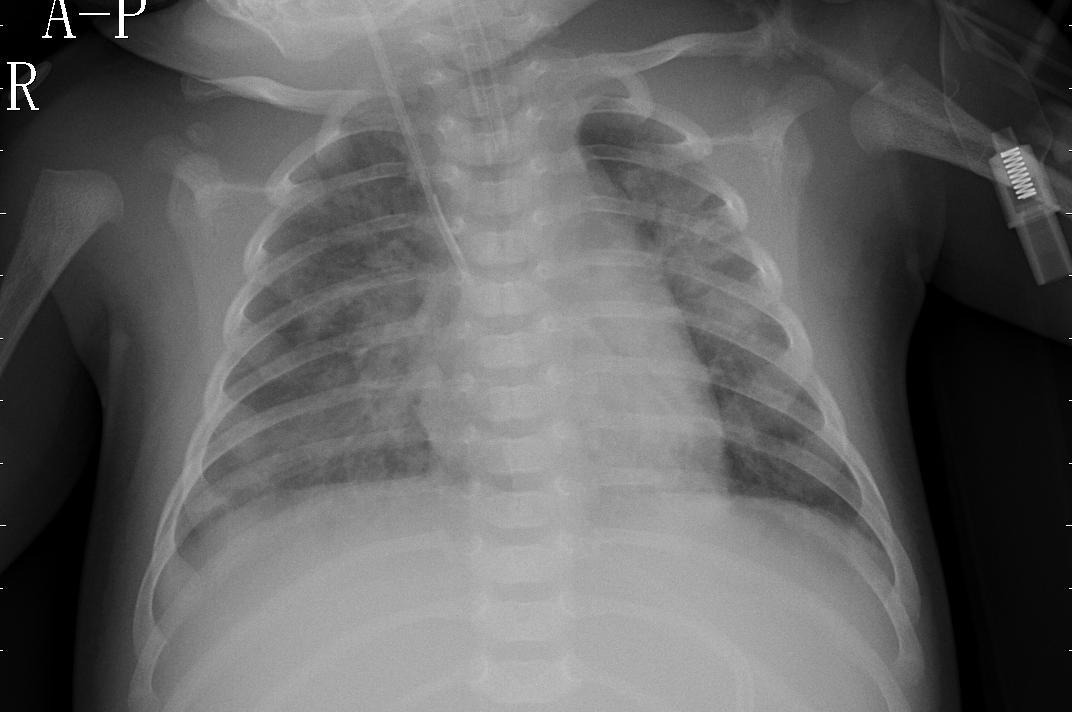

In [43]:
from IPython.display import display
from PIL import Image

NeumonialPath = 'val/PNEUMONIA/person1946_bacteria_4875.jpeg'
NormalPath = 'val/NORMAL/NORMAL2-IM-1430-0001.jpeg'
display(Image.open(NeumonialPath))

In [44]:
from tensorflow.keras.models import load_model
# from keras.preprocessing import image
import keras.utils as image
import numpy as np

model = load_model('model_vgg16.h5')

img = image.load_img(NeumonialPath , target_size = (224,224))

x = np.asarray(img)
x = np.expand_dims(x , axis = 0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

print(classes)

if classes [0][0] > classes[0][1]:
    print('X_ray image is Normal')
else:
    print('X_ray image is PNEUMONIA')
    

1/1 [==============================] - 0s 365ms/step
[[2.964683e-28 1.000000e+00]]
X_ray image is PNEUMONIA
